In [59]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

In [60]:
plt.rcParams['figure.figsize'] = [20,10]

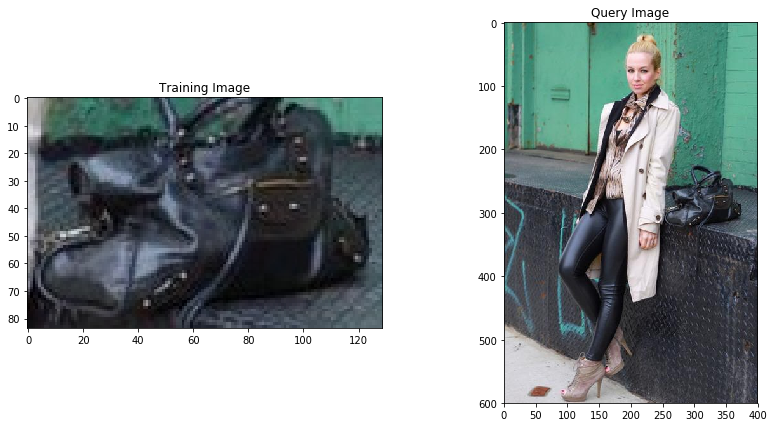

In [61]:
import cv2
import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [14.0, 7.0]

# Load the training image
image1 = cv2.imread('./MSD/sample_testset/crops/625dd192-96cc-59cd-83d0-ad5fa710b4bb.jpg')

# Load the query image
image2 = cv2.imread('./MSD/sample_testset/images/00c58d88-53e0-5314-947d-4763004df6df.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the query image to RGB
query_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Display the images
plt.subplot(121)
plt.imshow(training_image)
plt.title('Training Image')
plt.subplot(122)
plt.imshow(query_image)
plt.title('Query Image')
plt.show()

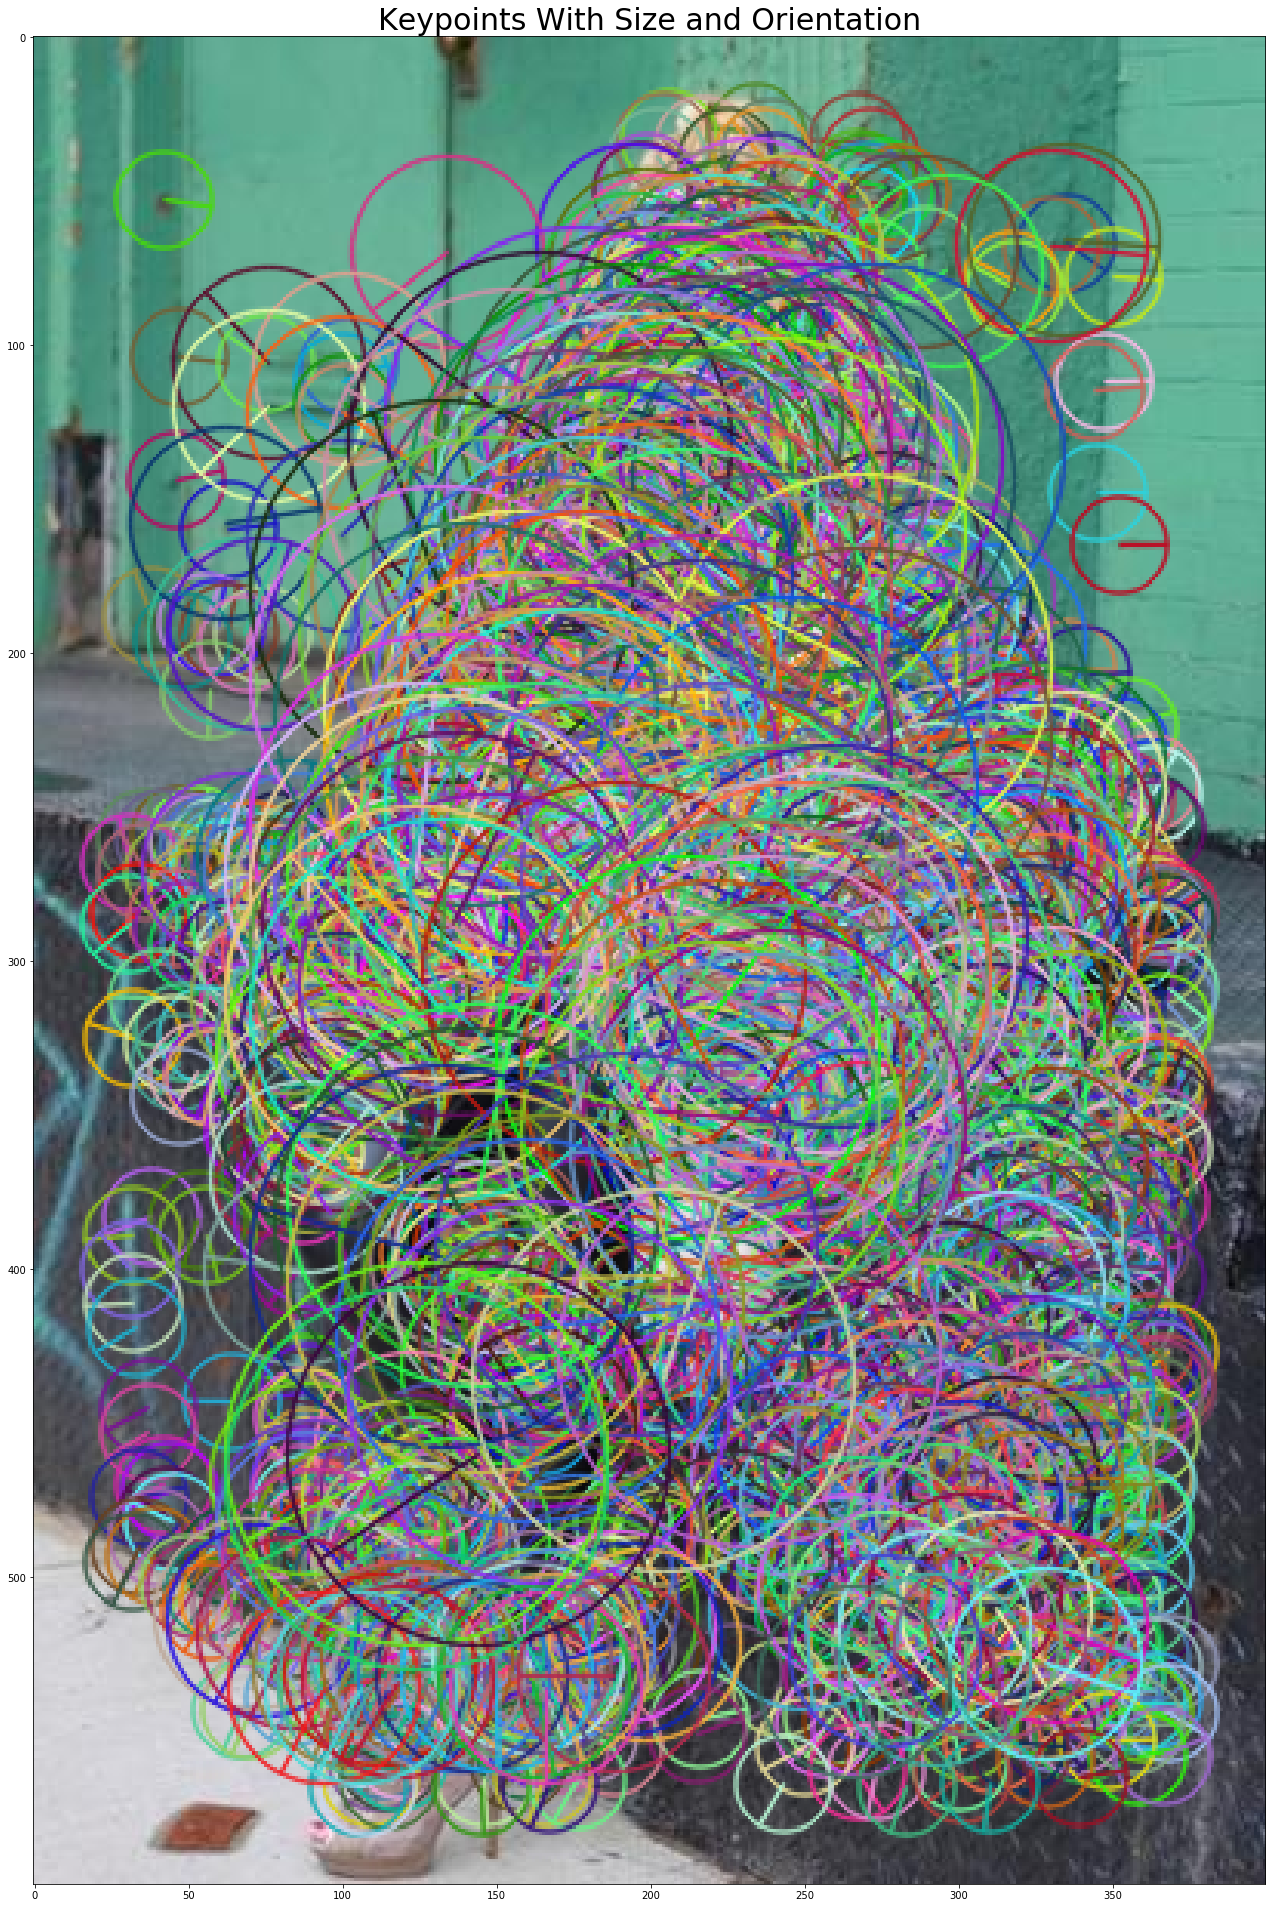


Number of keypoints Detected:  2502


In [62]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_BGR2GRAY)

# Convert the query image to gray scale
query_gray = cv2.cvtColor(query_image, cv2.COLOR_BGR2GRAY)

# Set the parameters of the ORB algorithm by specifying the maximum number of keypoints to locate and
# the pyramid decimation ratio
orb = cv2.ORB_create(5000, 2.0)

# Find the keypoints in the gray scale training and query images and compute their ORB descriptor.
# The None parameter is needed to indicate that we are not using a mask in either case.  
keypoints_train, descriptors_train = orb.detectAndCompute(training_gray, None)
keypoints_query, descriptors_query = orb.detectAndCompute(query_gray, None)

# Create copies of the query images to draw our keypoints on
query_img_keyp = copy.copy(query_image)

# Draw the keypoints with size and orientation on the copy of the query image
cv2.drawKeypoints(query_image, keypoints_query, query_img_keyp, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the query image with the keypoints with size and orientation
plt.title('Keypoints With Size and Orientation', fontsize = 30)
plt.imshow(query_img_keyp)
plt.show()

# Print the number of keypoints detected
print("\nNumber of keypoints Detected: ", len(keypoints_query))

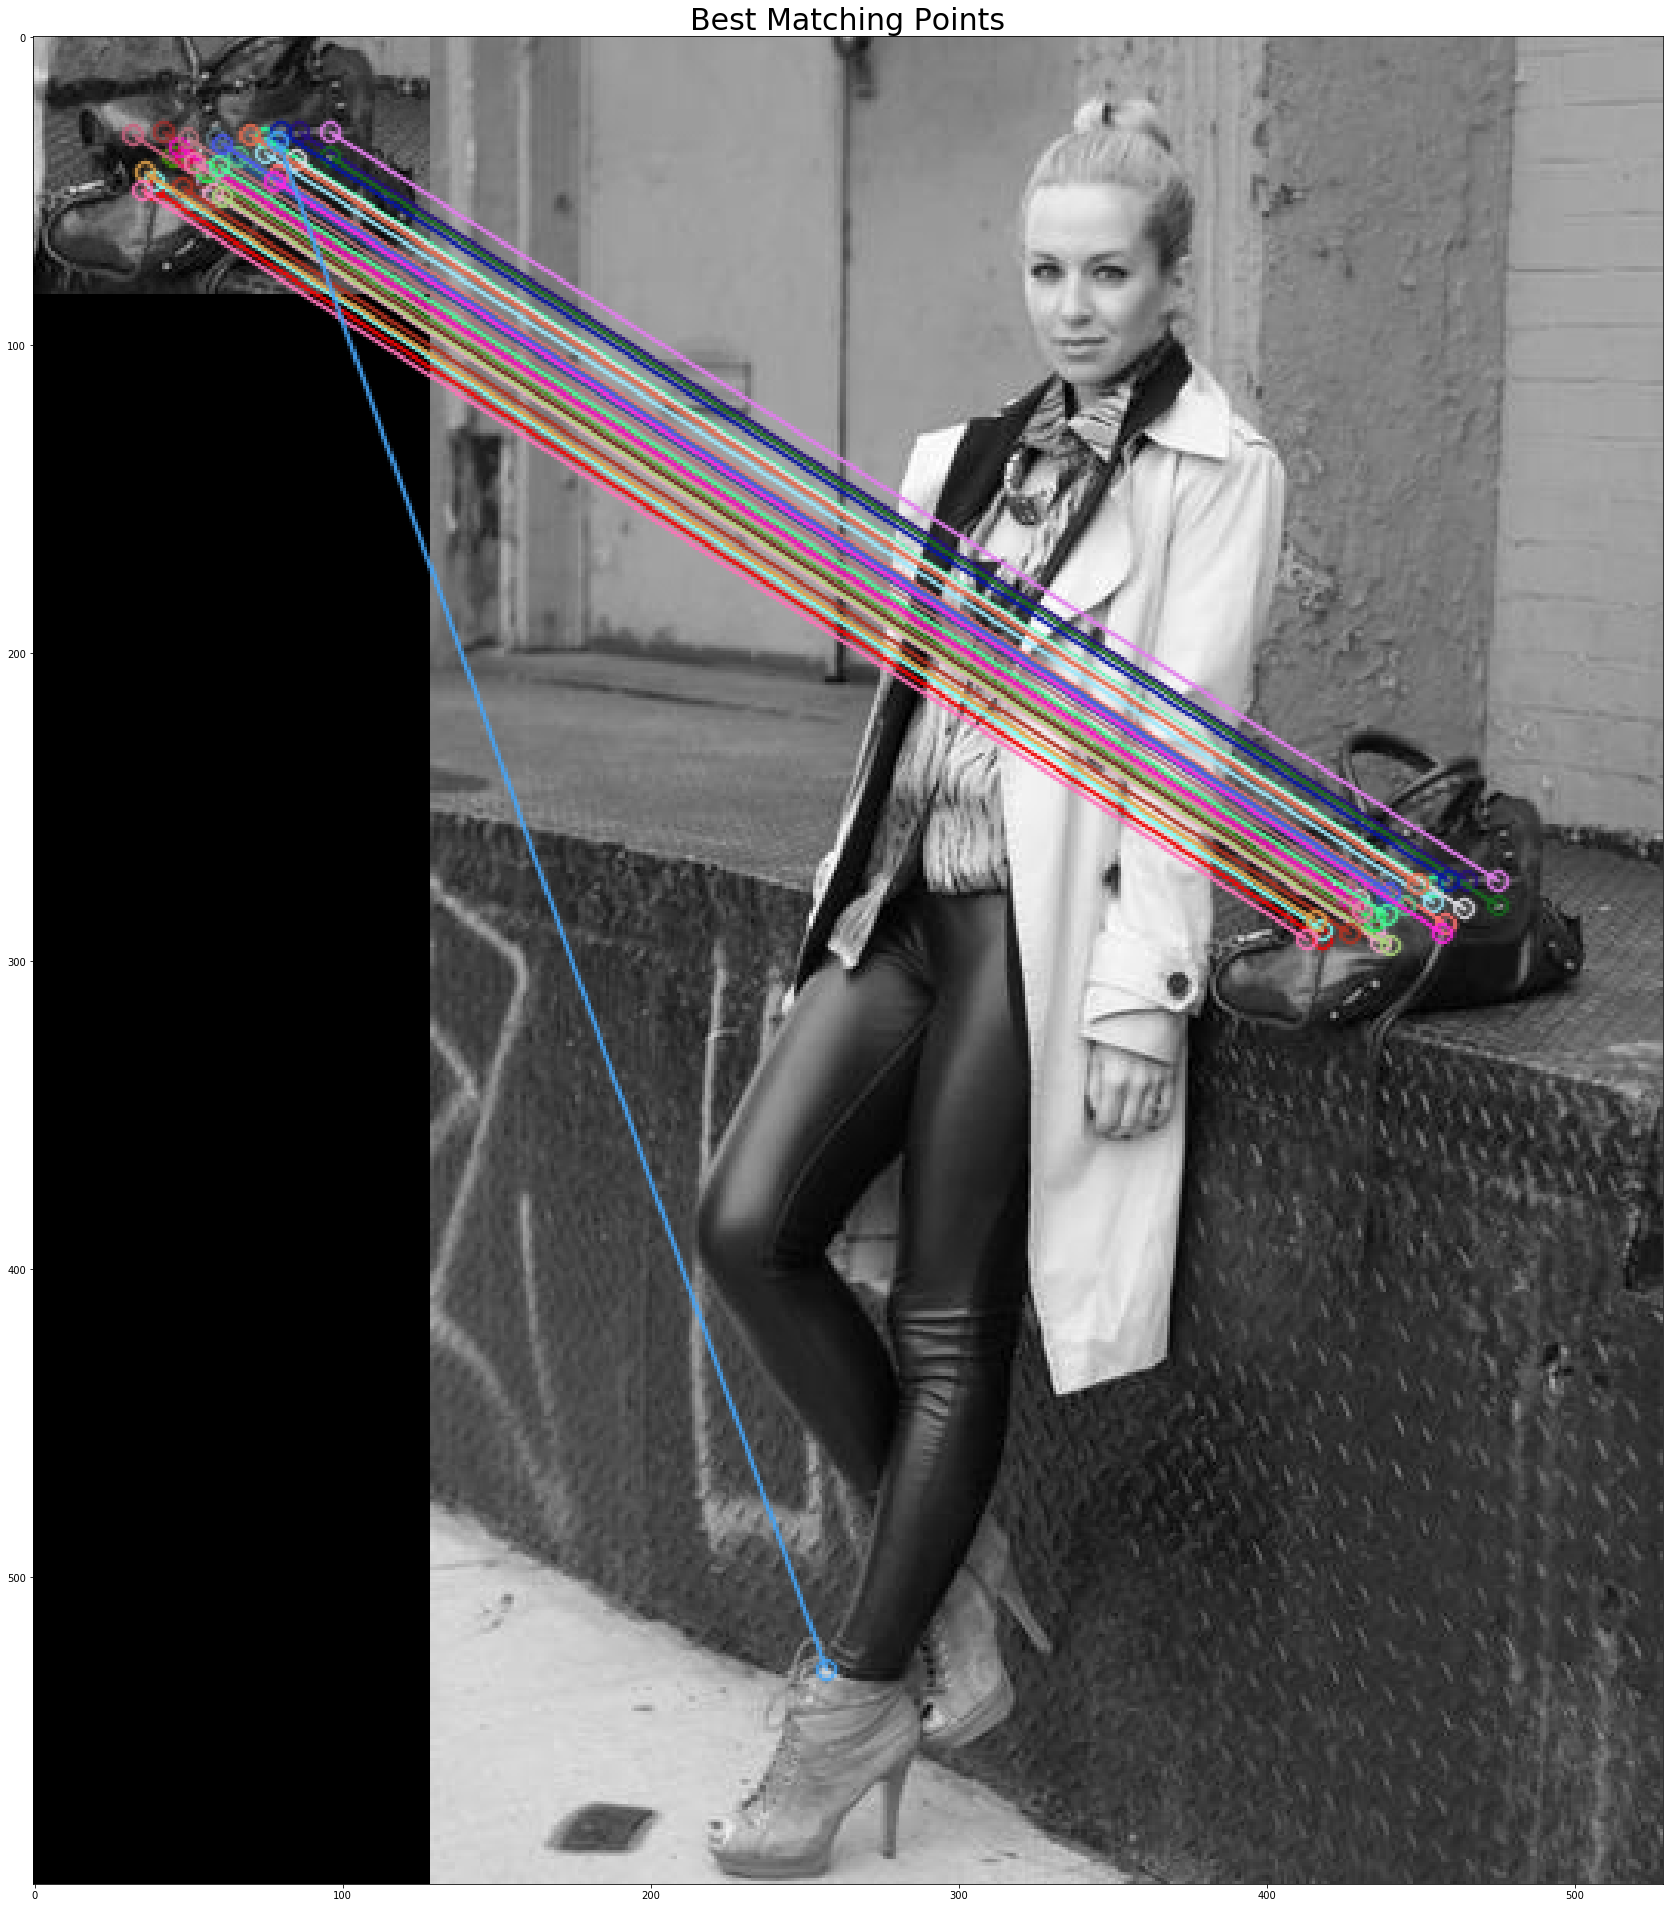

Number of Keypoints Detected In The Training Image:  37
Number of Keypoints Detected In The Query Image:  2502

Number of Matching Keypoints Between The Training and Query Images:  34


In [63]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [34.0, 34.0]

# Create a Brute Force Matcher object. We set crossCheck to True so that the BFMatcher will only return consistent
# pairs. Such technique usually produces best results with minimal number of outliers when there are enough matches.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the query image
matches = bf.match(descriptors_train, descriptors_query)

# The matches with shorter distance are the ones we want. So, we sort the matches according to distance
matches = sorted(matches, key = lambda x : x.distance)

# Connect the keypoints in the training image with their best matching keypoints in the query image.
# The best matches correspond to the first elements in the sorted matches list, since they are the ones
# with the shorter distance. We draw the first 85 mathces and use flags = 2 to plot the matching keypoints
# without size or orientation.
result = cv2.drawMatches(training_gray, keypoints_train, query_gray, keypoints_query, matches[:85], query_gray, flags = 2)

# we display the image
plt.title('Best Matching Points', fontsize = 30)
plt.imshow(result)
plt.show()

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(keypoints_train))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(keypoints_query))

# Print total number of matching Keypoints between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

In [64]:
# Initialize lists
list_kp1 = []
list_kp2 = []

# For each match...
for mat in matches[1:30]:

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1,y1) = keypoints_query[img1_idx].pt
    (x2,y2) = keypoints_train[img2_idx].pt

    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

IndexError: list index out of range

In [44]:
keypoints_query

[<KeyPoint 0x7f35ae7e2930>,
 <KeyPoint 0x7f35ae7e2900>,
 <KeyPoint 0x7f35ae7e2990>,
 <KeyPoint 0x7f35ae7e26f0>,
 <KeyPoint 0x7f35ae7e2c60>,
 <KeyPoint 0x7f35ae7e2960>,
 <KeyPoint 0x7f35ae7e2b10>,
 <KeyPoint 0x7f35ae7e2780>,
 <KeyPoint 0x7f35ae7e2870>,
 <KeyPoint 0x7f35ae7e28a0>,
 <KeyPoint 0x7f35ae7e2c90>,
 <KeyPoint 0x7f35ae7e27e0>,
 <KeyPoint 0x7f35ae7e2210>,
 <KeyPoint 0x7f35ae7e28d0>,
 <KeyPoint 0x7f35ae7e21e0>,
 <KeyPoint 0x7f35ae7e21b0>,
 <KeyPoint 0x7f35ae7e2240>,
 <KeyPoint 0x7f35a4bc5090>,
 <KeyPoint 0x7f35a4bc56f0>,
 <KeyPoint 0x7f35a4bc5270>,
 <KeyPoint 0x7f35a4bc50c0>,
 <KeyPoint 0x7f35a4bc5210>,
 <KeyPoint 0x7f35a4bc56c0>,
 <KeyPoint 0x7f35a4bc5150>,
 <KeyPoint 0x7f35a4bc5780>,
 <KeyPoint 0x7f35a4bc5d50>,
 <KeyPoint 0x7f35a4bc5d80>,
 <KeyPoint 0x7f35a4bc5db0>,
 <KeyPoint 0x7f35a4bc5de0>,
 <KeyPoint 0x7f35a4bc5e10>,
 <KeyPoint 0x7f35a4bc5e40>,
 <KeyPoint 0x7f35a4bc5e70>,
 <KeyPoint 0x7f35a4bc5ea0>,
 <KeyPoint 0x7f35a4bc5ed0>,
 <KeyPoint 0x7f35a4bc5f00>,
 <KeyPoint 0x7f35a4b

In [22]:
x = [row[0] for row in list_kp1]
y = [row[1] for row in list_kp1]

In [23]:
x1 = round(min(x))
x2 = round(max(x))

In [24]:
y1 = round(min(y))
y2 = round(max(y))

In [25]:
crop_image = image2[x1:x2,y1:y2]

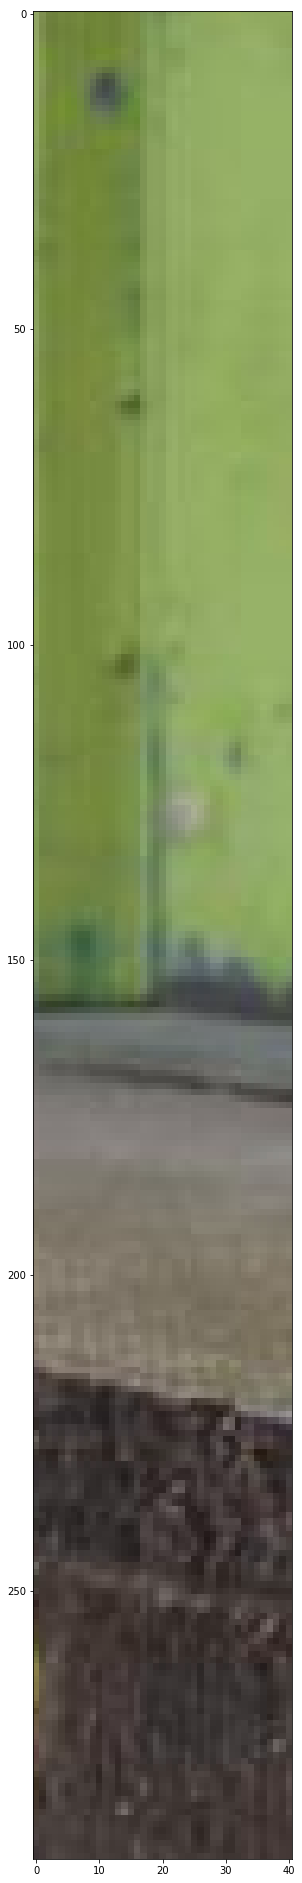

In [26]:
plt.imshow(crop_image, cmap = 'gray')